# <h1>Shor's Algorithm and RSA Cryptosystem</h1>

<b>Intructions</b>

Comment on quantum computing or quantum machine learning. You can also comment on one quantum algorithm or one quantum software you are familiar with. You can also suggest methods you think are good and you would like to work on. Please use your own understanding. Comments copied from the internet will not be considered.

This notebook introduces Shor's algorithm, starting with cryptographic systems and continuing with the algorithm itself. It contains two main codes: one focusing on the RSA encryption process, and the other using Shor's algorithm to decrypt a message.

## **Table of Content**

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Introduction to cryptography](#1-introduction-to-cryptography)<br>
2. [RSA cryptosystem](#2-rsa-cryptosystem) <br>
3. [Shor's algorithm overview](#3-shors-algorithm-overview) <br>
4. [Conclusions](#4-conclusion-and-reflections) <br>
5. [References](#5-references) <br>
    </div>
    <hr>
***

## <h2>1. Introduction to Cryptography</h2>

To understand the motivations behind Shor's algorithm, which we'll refer to as "S.A." from now on, we need to understand some basic cryptographic concepts before moving on to the RSA system, which SA claims to have broken. 

First of all... what is cryptography?
>> Cryptography is the art of writing or solving codes.

>> <i>Concise Oxford English Dictionary</i>

    
The modern cryptography involves the study of mathematical techniques for securing digital information, systems, and distributed computations against adversarial attacks. This means the cryptography helps us to mantein our secret messages ... secrets.

### 1.1 Basic scenario

Alice and Bob wish to communicate secretly. To do so, they use a cryptosystem or <i>cipher</i>.

* Alice has a message or <i>plaintext</i> $M$ which she encrypts using an encryption function $e(\cdot)$.
* This producess a <i>ciphertext</i> $C = e(M)$
* She sends this to Bob who <i>decrypts</i> it using a decryption function $d(\cdot)$
\begin{equation*}
\begin{aligned}
    M &= d(C) \\
    & = d(e(M))
\end{aligned}
\end{equation*}

This scheme belongs to an asymmetric system. There are two types of schemes.
* <b>Symmetric:</b> Same key for encryption and decryption, $d = e$ .
* <b>Asymmetric:</b> Public key for encryption, private key for decryption, $d \neq e$.

___
___

## <h2>2. RSA Cryptosystem</h2>

The RSA (Rivest, Shamir y Adleman) cryptosystem is asymmetric and it uses a pair as key
* Public key: $(e,N)$
* Private key: $(d,N)$

The security is based on the difficulty of factoring large numbers, in this case $N$ is the large number.

### 2.1 General Idea

* Alice wants to send Bob a secure message.
* Bob shares his <b>public key</b>, so anyone can send him messages.
* Alice encrypts her message with Bob’s <b>public key</b>.
* Only Bob can <b>decrypt</b> it using his <b>private key</b>.

<b>Step 1: Key generation</b>

1. choose two large prime numbers: $p$ and $q$
2. Compute $N = p \times q$
3. Compute Euler's totient: $\phi(N) = (p-1)(q-1)$
4. Choose encryption exponent $e$ such that $gcd(e, \phi(N)) = 1$
5. Compute decryption exponent (Euclides' algorithm) $d$ as $d \equiv e^{-1}\ mod\ \phi(N)$

<b>Step 2: Public and private keys</b>

* <b>Public key:</b> $(e,N)$ used for encryption
* <b>Private key:</b> $(d,N)$ used for decryption
* Knowing $e$ and $N$ does not reveal $d$ unless factoring $N$ is feasible.

<b>Step 3: Encryption</b>

Convert message $M$ into a numerical representation.
* Compute ciphertext:
\begin{equation*}
C = M^e\ mod\ N
\end{equation*}
* Send $C$ to Bob.

<b>Step 4: Decryption</b>

* Bob computes the original message:
$$M = C^d\ mod\ N$$
* Only Bob, who knows $d$, can decrypt $C$.

### 2.2 Code

In [2]:
# === RSA Interactive Demo ===
import math
from numpy.random import randint, choice

#--------------------------
#   Functions
#--------------------------

# Convert a string into a list of numbers using ASCII values
def string_to_numbers(text):
    """Converts a string into a list of integer values using UTF-8 encoding."""
    return list(text.encode("utf-8"))

def numbers_to_string(numbers):
    """Converts a list of integer values back into a string using UTF-8 decoding."""
    return bytes(numbers).decode("utf-8")

# Encrypt and decrypt each character separately
def encrypt(text, e, N, k):
    """Encrypts a UTF-8 encoded string using RSA with grouped bytes."""
    byte_list = string_to_numbers(text)
    grouped_numbers = group_bytes(byte_list, k)
    encrypted_values = [pow(num, e, N) for num in grouped_numbers]
    return encrypted_values


def decrypt(encrypted_values, d, N, k):
    """Decrypts RSA-encrypted numbers and reconstructs the original string."""
    decrypted_numbers = [pow(num, d, N) for num in encrypted_values]
    byte_list = ungroup_bytes(decrypted_numbers, k)
    return numbers_to_string(byte_list)


def prime_number(n):
    """Check if a number n is primer or not"""
    if n < 2:
        return False
    for i in range (2, int(math.sqrt(n) + 1)):
        if n % i ==0:
            return False
    return True

def modular_inverse(e, phi):
    """Computes the modular inverse of e mod phi."""
    try:
        return pow(e, -1, phi)
    except ValueError:
        return None
    
# Function obtaining e and d
def get_e_and_d(phi):
    """Finds a valid prime e < phi and its modular inverse d, ensuring e ≠ d.
    
    Returns:
        (e, d): Tuple with valid values or (None, None) if no valid pair is found.
    """
    primes = [i for i in range(2, phi) if prime_number(i) and math.gcd(i, phi) == 1]
    
    if not primes:
        return None, None
    
    while primes:
        e = int(choice(primes))
        d = modular_inverse(e, phi)
        
        if d is not None and d != e:
            return e, d
        primes.remove(e)
    
    return None, None


def group_bytes(byte_list, k):
    """Group k bytes together into single large numbers."""
    grouped = []
    for i in range(0, len(byte_list), k):
        chunk = byte_list[i:i+k]
        num = sum(byte << (8 * j) for j, byte in enumerate(chunk))
        grouped.append(num)
    return grouped

def ungroup_bytes(number_list, k):
    """Split large numbers back into their original bytes."""
    byte_list = []
    for num in number_list:
        chunk = [(num >> (8 * j)) & 0xFF for j in range(k)]
        byte_list.extend(chunk)
    return byte_list

In [ ]:
#------------------------------
#       Encrypt
#------------------------------

# Acquire input values
print("\n______________________________________________________\n")
print("\nExamples of prime numbers: [11, 13, 17, 19, 41, 67, 71, 89, 97, 101, 919, 997, ...] \n")

p = 17
q = 19

N = p * q
phi = (p - 1) * (q - 1)
k = math.floor(math.log(N, 256))

e, d = get_e_and_d(phi)
while e is None or d is None:
    e, d = get_e_and_d(phi)
    
# Define keys
public = (e, N)
private = (d, N)
print("\nThe public key is:", public)
print("The private key is:", private)
    
#-------------------
#   Message
#-------------------

# Get user input
message = "Hello, today is a great day!"

# Encrypt and decrypt
encrypted_message = encrypt(message, e, N, k)
decrypted_message = decrypt(encrypted_message, d, N, k)

print("\nOriginal Message:", message)
print("Encrypted Message (as numbers):", encrypted_message)
print("Decrypted Message:", decrypted_message)

# Check if decryption was successful
if decrypted_message == message:
    print("The message was correctly decrypted!")
else:
    print("Something went wrong.")


______________________________________________________


Examples of prime numbers: [11, 13, 17, 19, 41, 67, 71, 89, 97, 101, 919, 997, ...] 


The public key is: (83, 323)
The private key is: (59, 323)

Original Message: Hello, today is a great day!
Encrypted Message (as numbers): [98, 169, 97, 97, 66, 150, 230, 262, 66, 196, 300, 144, 230, 299, 191, 230, 300, 230, 69, 266, 169, 300, 262, 230, 196, 300, 144, 203]
Decrypted Message: Hello, today is a great day!
The message was correctly decrypted!


### 2.3 The Problem: Factoring Complexity

The best classical algorithm is the General Number Field Sieve (GNFS) and the required resources increase exponentially with the number $N$.

\begin{equation}
    O\left(e^{(c (\log N)^{1/3} (\log \log N)^{2/3})}\right)
\end{equation}

___
___

## 3. Shor's Algorithm: Overview

The SA allows us to efficiently factorize a composite integer $N=p \times q$.

This is important because classical factorization is believed to be intractable (sub-exponential time), while Shor's algorithm runs in polynomial time, posing a threat to RSA and other cryptosystems.

<b>Key Idea:</b> Reduce factorization to the order-finding problem:
\begin{equation*}
    \text{Given } a,\, N, \text{ find } r \text{ such that } a^r \equiv 1 \pmod{N}.
\end{equation*}

<b>Structure</b>

<b>Inputs:</b> Number $N$ to be factored.
    
<b>Outputs:</b> A non-trivial factor of $N$.
    
<b>Procedure:</b>
* Choose random integer $a < N$.
* Compute greatest common divisor: if $\gcd(a, N) > 1$, done.
* Use quantum Fourier transform (QFT) to find period $r$ of $a^x \mod N$.
* Is $r$ is even and $x^{r/2}\neq -1\ mod\ N$ then compute $\gcd(a^{r/2} \pm 1, N)$ to obtain factors (repeat if it is necessary).
    
<b>Runtime:</b> $O((\log N)^3)$, polynomial time.

### 3.1 Code

The hardest part is developing the SA oracle. This oracle extracts the eigenvalues ​​of an operator, which is necessary because the SA needs to extract the period of the function associated with the RSA system.

Below, we present a proposal for an oracle, to factorize the number 15.

In [23]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from math import gcd
import random
from qiskit_aer import Aer

# Compuerta c_U
def c_amod15(a, potencia):
    '''Compuerta control con a mod 15'''
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2, 4, 7, 8, 11 o 13")
    U = QuantumCircuit(4)
    for _iteration in range(potencia):
        if a in [2, 13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7, 8]:
            U.swap(0,1)          
            U.swap(1,2)
            U.swap(2,3)
        if a in [4,11]:
            U.swap(1,3)          
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{potencia} mod 15"
    c_U = U.control()
    return c_U

# QFT inversa
def qft_dagger(n):
    '''n-quibit aplica QFTdagger a los primeros n quibits'''
    qc = QuantumCircuit(n)
    # Hacemos los respectivos swaps
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT_dagger"
    return qc

# Order-finding algorithm
def quantum_order_finding(a, N):
    """
    Defines and executes the quantum circuit to find the period r of a^r mod N.
    """
    # Number of qubits for register and measurement
    n = int(np.ceil(np.log2(N))) 
    num_qubits = 2 * n  # We use 2n qubits in total
    
    # Definition of the quantum circuit
    qc = QuantumCircuit(num_qubits, n)
    
    # We apply hadarmard to the first n qibits
    for q in range(n):
        qc.h(q)
    
    # We initialize the auxiliary register to 1
    qc.x(n)
    
    # We perform the Control-U operations in the second register
    for q in range (n):
        qc.append(c_amod15(a, 2**q),
                [q] + [i + n for i in range(n)])

    
    # Apply the Inverse Quantum Fourier Transform
    qc.append(qft_dagger(n), range(n))
    
    # Measure the first n qibits
    qc.measure(range(n), range(n))
    
    # We draw the circuit
    qc.draw(fold=-1)

    # Run in the simulator
    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(qc, aer_sim)
    counts = aer_sim.run(t_qc).result().get_counts()
    
    plot_histogram(counts)
    
    return counts, qc


def classical_post_processing(counts, N, a):
    """
    Process the results of the quantum circuit to find the period r and obtain the factors of N.
    """
    measured_values = [int(k, 2) for k in counts.keys()]
    measured_values.sort()
    
    for m in measured_values:
        if m == 0:
            continue
        
        # Approximate the period r using continued fractions
        r = round(N / m)
        
        if r % 2 == 1:
            continue  # r must be even to apply factoring
        
        # Obtaining the factors of N
        factor1 = gcd(a**(r//2) - 1, N)
        factor2 = gcd(a**(r//2) + 1, N)
        
        if factor1 > 1 and factor1 < N:
            return factor1, factor2
    
    return None, None

def shor_algorithm(N):
    """
    Implement Shor's algorithm to factor N.
    """
    # A random number is chosen, a < N
    while True:
        a = random.randint(2, N//2)
        if gcd(a, N) == 1:
            print(f"a = {a}")
            break
    
    # Run the quantum part
    counts, circuit = quantum_order_finding(a, N)
    
    # Classical processing to obtain the factors
    factor1, factor2 = classical_post_processing(counts, N, a)
    
    if factor1 is None:
        print("No factorization found, please try again.")
    else:
        print(f"The factors of {N} are {factor1} and {factor2}.")
    
    return factor1, factor2, circuit

# Run the SA for 15
N = 15 
Factor1, Factor2, circuit = shor_algorithm(N)

a = 7
The factors of 15 are 3 and 5.


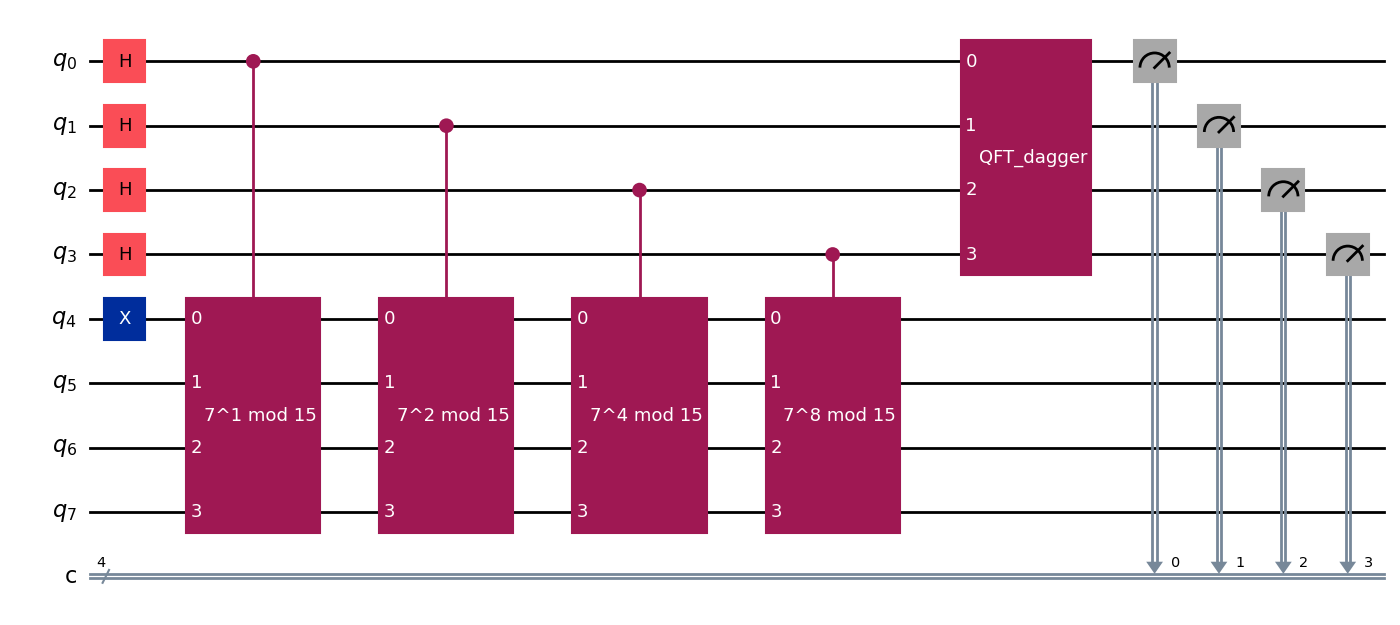

In [24]:
display(circuit.draw('mpl'))

___
___

## 4. Conclusion and Reflections

Shor's algorithm is a revolutionary algorithm that promises to break the RSA system, but it is too sensitive to noise and inefficient with current quantum computers. Meanwhile, post-quantum cryptography is working on creating new systems that RSA cannot handle.

Another important problem is the definition and effective implementation of the oracle; this is a topic still under development that could be addressed through new methods, either with neural networks or quantum algorithms. 

___
___

## 5. References

- Nielsen, M. A., & Chuang, I. L. (2012). Quantum Computation and Quantum Information. https://doi.org/10.1017/cbo9780511976667
- Talbot, J., & Welsh, D. (2006). Complexity and Cryptography. https://doi.org/10.1017/cbo9780511755286